C:\Users\manis\AppData\Local\Temp\ipykernel_6412\3926196664.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\manis\AppData\Local\Temp\ipykernel_6412\3926196664.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None

First 5 rows:
    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  

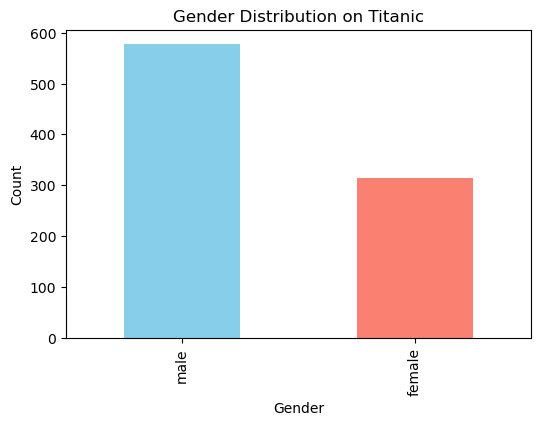

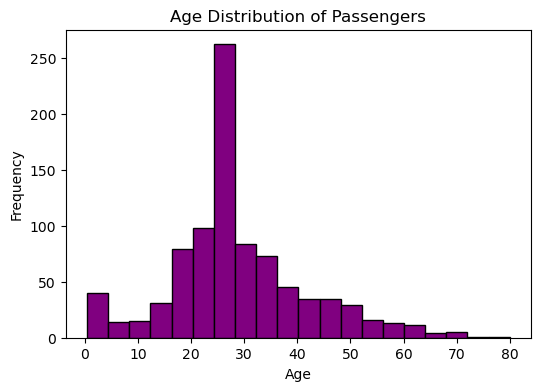


Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


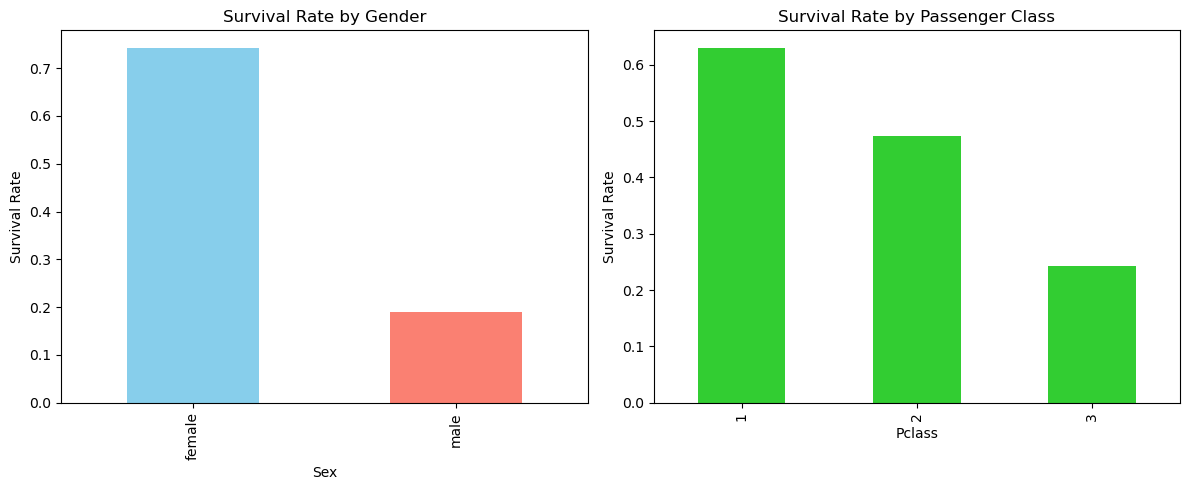

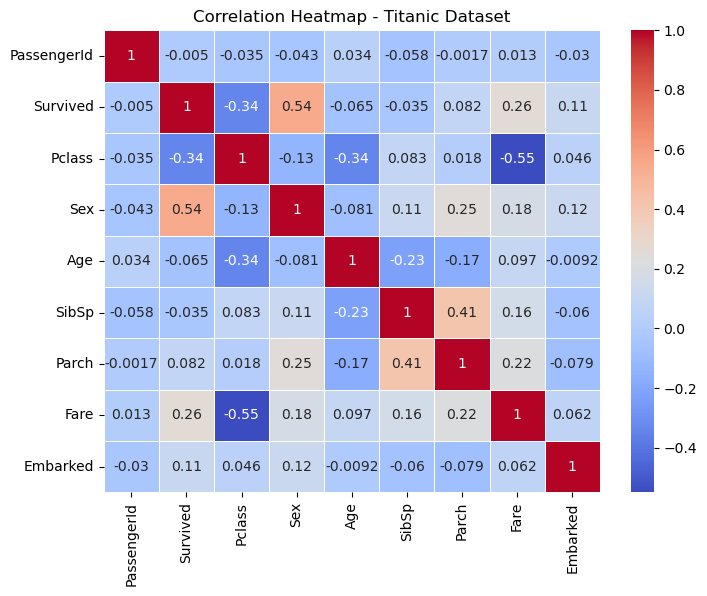

In [3]:
# ===============================
# PART A: Titanic Dataset EDA
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# -----------------
# Data Cleaning
# -----------------
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# -----------------
# Basic Info
# -----------------
print(df.info())
print("\nFirst 5 rows:\n", df.head())

# -----------------
# Visualization 1: Gender Distribution
# -----------------
plt.figure(figsize=(6,4))
df['Sex'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Gender Distribution on Titanic")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# -----------------
# Visualization 2: Age Distribution
# -----------------
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20, color='purple', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# -----------------
# EDA: Survival Rate by Gender and Class
# -----------------
survival_by_gender = df.groupby('Sex')['Survived'].mean()
survival_by_class = df.groupby('Pclass')['Survived'].mean()

print("\nSurvival Rate by Gender:\n", survival_by_gender)
print("\nSurvival Rate by Class:\n", survival_by_class)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
survival_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

plt.subplot(1,2,2)
survival_by_class.plot(kind='bar', color='limegreen')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# -----------------
# Correlation Heatmap
# -----------------
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()